In [2]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Conv2DTranspose,ReLU,LeakyReLU

In [3]:
from PIL import Image
import os
import numpy as np

def load_images_from_folder_rgb(folder_path):
    images = []
    labels = []
    cnt =0    
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            
            img = Image.open(img_path).convert('RGB')  # Convert to RGB if the image is in grayscale
            
            img_array = np.array(img) / 255.0  # Normalize pixel values to be between 0 and 1
            images.append(img_array)
            cnt = cnt +1
            if cnt==500:
                break
    return np.array(images), np.array(labels)





def load_images_from_folder_gray(folder_path):
    images = []
    labels = []
    cnt =0    
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            
            img = Image.open(img_path).convert('L') 
            
            img_array = np.array(img) / 255.0  # Normalize pixel values to be between 0 and 1
            images.append(img_array)
            cnt = cnt +1
            if cnt==500:
                break   
    return np.array(images), np.array(labels)

In [4]:
color_images,_ = load_images_from_folder_rgb('/kaggle/input/image-colorization-dataset/data/train_color')
gray_images,_ = load_images_from_folder_gray('/kaggle/input/image-colorization-dataset/data/train_black')

In [7]:
print(color_images.shape,gray_images.shape)

(500, 400, 400, 3) (500, 400, 400)


In [8]:
print(color_images.shape,gray_images.shape)

(500, 400, 400, 3) (500, 400, 400)


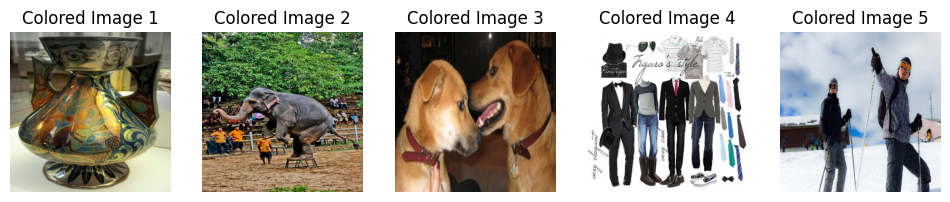

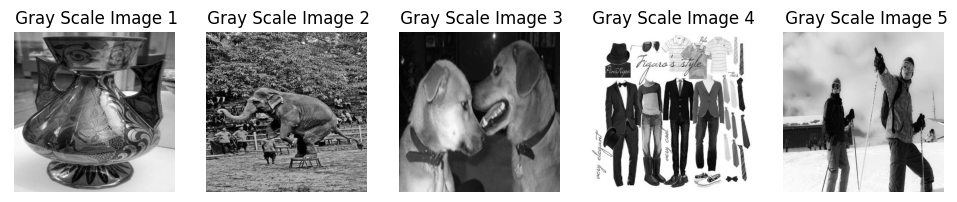

In [9]:
# Display the first 5 images from the dataset
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(color_images[i])
    plt.title(f"Colored Image {i + 1}")
    plt.axis('off')

plt.show()

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(gray_images[i],cmap='gray')
    plt.title(f" Gray Scale Image {i + 1}")
    plt.axis('off')

plt.show()

In [10]:
gray_three_dim = np.expand_dims(gray_images,axis=-1)
gray_three_dim = np.tile(gray_three_dim,(1,1,3))

In [13]:
gray_images = gray_three_dim

In [14]:
print(gray_images.shape)
print(color_images.shape)

(500, 400, 400, 3)
(500, 400, 400, 3)


In [15]:
x_train_color,x_test_color,x_train_gray,x_test_gray=train_test_split(color_images,gray_images,test_size=0.2,random_state=100,shuffle= False)

In [16]:
print(x_train_color.shape,x_train_gray.shape)
print(x_test_color.shape,x_test_gray.shape)

(400, 400, 400, 3) (400, 400, 400, 3)
(100, 400, 400, 3) (100, 400, 400, 3)


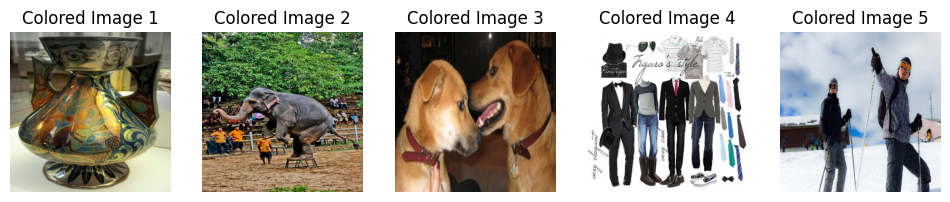

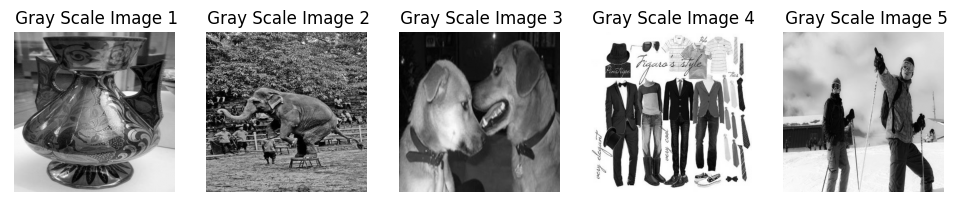

In [17]:
# Display the first 5 images from training dataset
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train_color[i])
    plt.title(f"Colored Image {i + 1}")
    plt.axis('off')

plt.show()

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train_gray[i],cmap='gray')
    plt.title(f" Gray Scale Image {i + 1}")
    plt.axis('off')

plt.show()

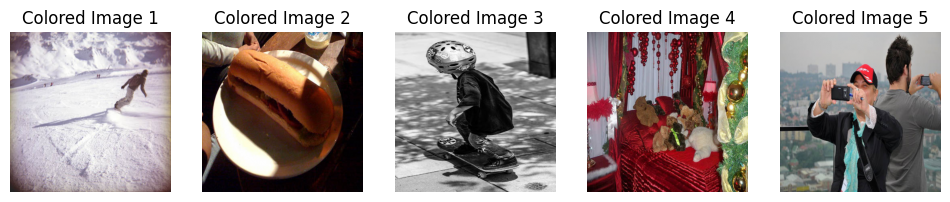

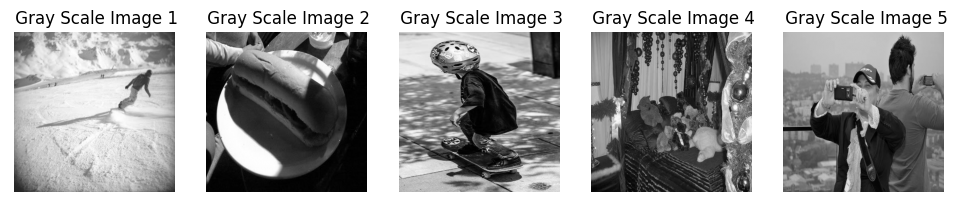

In [18]:
# Display the first 5 images from testing dataset
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_color[i])
    plt.title(f"Colored Image {i + 1}")
    plt.axis('off')

plt.show()

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_gray[i],cmap='gray')
    plt.title(f" Gray Scale Image {i + 1}")
    plt.axis('off')

plt.show()

In [19]:
Encoder_G = Sequential()
Encoder_G.add(Conv2D(32,(2,2),kernel_initializer = 'he_normal',padding = "same",use_bias = True))
Encoder_G.add(BatchNormalization())
Encoder_G.add(LeakyReLU(alpha=0.1))

Encoder_G.add(Conv2D(64,(2,2),kernel_initializer = 'he_normal',padding = "same",use_bias = True))
Encoder_G.add(BatchNormalization())
Encoder_G.add(LeakyReLU(alpha=0.1))

Encoder_G.add(Conv2D(128,(2,2),kernel_initializer = 'he_normal',padding = "same",use_bias = True))
Encoder_G.add(BatchNormalization())
Encoder_G.add(LeakyReLU(alpha=0.1))

Encoder_G.add(Conv2D(256,(2,2),kernel_initializer = 'he_normal',padding = "same",use_bias = True))
Encoder_G.add(BatchNormalization())
Encoder_G.add(LeakyReLU(alpha=0.1))


Decoder_G = Sequential()
Decoder_G.add(Conv2DTranspose(128,(2,2),padding = "same",use_bias = True))
Decoder_G.add(LeakyReLU(alpha=0.1))
#
Decoder_G.add(Conv2DTranspose(64,(2,2),padding = "same",use_bias = True))
Decoder_G.add(LeakyReLU(alpha=0.1))
#
Decoder_G.add(Conv2DTranspose(32,(2,2),padding = "same",use_bias = True))
Decoder_G.add(LeakyReLU(alpha=0.1))
#
Decoder_G.add(Conv2DTranspose(3,(2,2),padding = "same",use_bias = True))
Decoder_G.add(LeakyReLU(alpha=0.1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [20]:
Auto_Encoder = Sequential([Encoder_G,Decoder_G])

In [22]:
Auto_Encoder.compile(loss="mse",optimizer='adam',metrics=['accuracy'])

In [23]:
Auto_Encoder.fit(x_train_gray,x_train_color,epochs=40,batch_size=8)

Epoch 1/40


2024-03-21 10:21:28.836787: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[128,64,2,2]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,64,401,401]{3,2,1,0}, f32[8,128,400,400]{3,2,1,0}), window={size=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-21 10:21:30.185965: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2.349277479s
Trying algorithm eng0{} for conv (f32[128,64,2,2]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,64,401,401]{3,2,1,0}, f32[8,128,400,400]{3,2,1,0}), window={size=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-21 10:21:32.433496: E external/local_xla/xla/service/sl

50/50 ━━━━━━━━━━━━━━━━━━━━ 146s 925ms/step - accuracy: 0.3698 - loss: 0.0806
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 903ms/step - accuracy: 0.4613 - loss: 0.0195
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 914ms/step - accuracy: 0.4381 - loss: 0.0165
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 909ms/step - accuracy: 0.4834 - loss: 0.0126
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 913ms/step - accuracy: 0.4861 - loss: 0.0132
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 912ms/step - accuracy: 0.4603 - loss: 0.0148
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 910ms/step - accuracy: 0.5117 - loss: 0.0140
Epoch 8/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 912ms/step - accuracy: 0.4628 - loss: 0.0112
Epoch 9/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 913ms/step - accuracy: 0.4899 - loss: 0.0107
Epoch 10/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 912ms/step - accuracy: 0.5026 - loss: 0.0120
Epoch 11/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 913ms/step - accuracy: 0.4801 - loss: 0.0112
Epoch 12/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 916ms/st

In [24]:
pred_color_images = Auto_Encoder.predict(x_test_gray[:10])

2024-03-21 10:53:42.206777: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng36{k2=3,k3=0} for conv (f32[10,256,400,400]{3,2,1,0}, u8[0]{0}) custom-call(f32[10,128,401,401]{3,2,1,0}, f32[256,128,2,2]{3,2,1,0}, f32[256]{0}), window={size=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-21 10:53:42.211731: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.00507419s
Trying algorithm eng36{k2=3,k3=0} for conv (f32[10,256,400,400]{3,2,1,0}, u8[0]{0}) custom-call(f32[10,128,401,401]{3,2,1,0}, f32[256,128,2,2]{3,2,1,0}, f32[256]{0}), window={size=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while

1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step


In [25]:
print(pred_color_images[5].shape)

(400, 400, 3)


Text(0.5, 1.0, 'AUTO ENCODER OUTPUT')

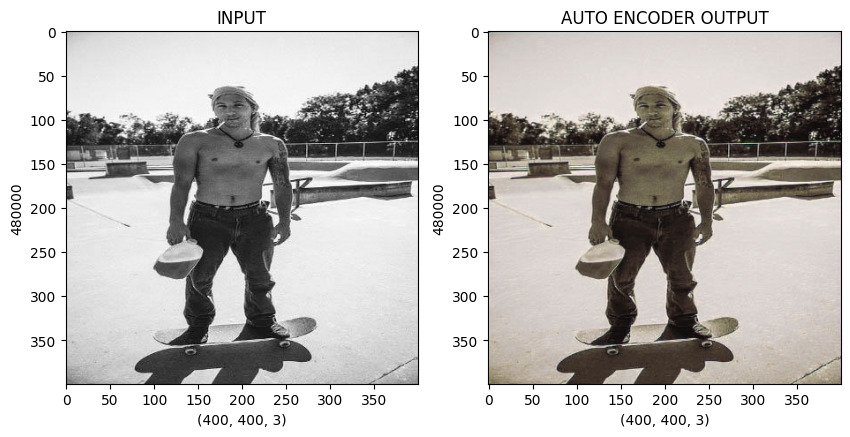

In [33]:
figure,axis = plt.subplots(1,2,figsize=(10,10))
prediction_img_number = 5

Original_Img = x_test_gray[prediction_img_number]
Predict_Image_AE = pred_color_images[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("INPUT")
axis[1].imshow(Predict_Image_AE)
axis[1].set_xlabel(Predict_Image_AE.shape)
axis[1].set_ylabel(Predict_Image_AE.size)
axis[1].set_title("AUTO ENCODER OUTPUT")

Text(0.5, 1.0, 'AUTO ENCODER OUTPUT')

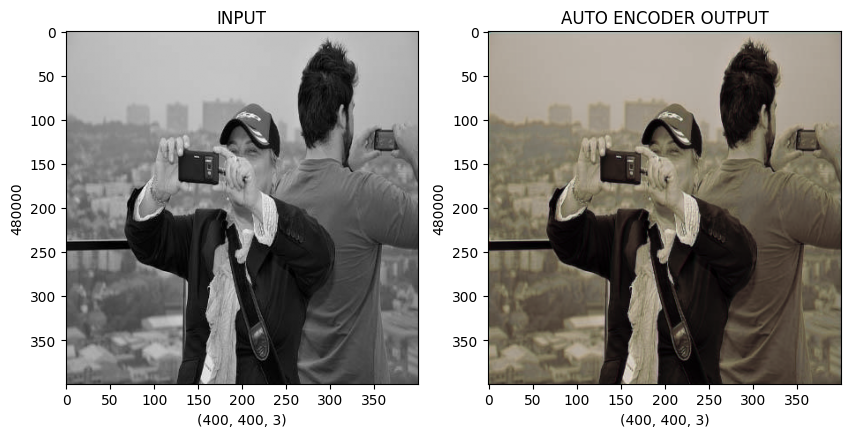

In [32]:
figure,axis = plt.subplots(1,2,figsize=(10,10))
prediction_img_number = 4

Original_Img = x_test_gray[prediction_img_number]
Predict_Image_AE = pred_color_images[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("INPUT")
axis[1].imshow(Predict_Image_AE)
axis[1].set_xlabel(Predict_Image_AE.shape)
axis[1].set_ylabel(Predict_Image_AE.size)
axis[1].set_title("AUTO ENCODER OUTPUT")

Text(0.5, 1.0, 'AUTO ENCODER OUTPUT')

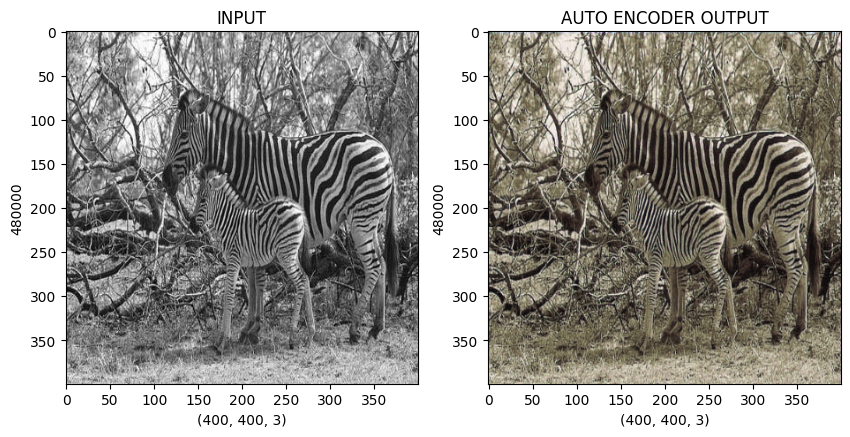

In [35]:
figure,axis = plt.subplots(1,2,figsize=(10,10))
prediction_img_number = 9

Original_Img = x_test_gray[prediction_img_number]
Predict_Image_AE = pred_color_images[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("INPUT")
axis[1].imshow(Predict_Image_AE)
axis[1].set_xlabel(Predict_Image_AE.shape)
axis[1].set_ylabel(Predict_Image_AE.size)
axis[1].set_title("AUTO ENCODER OUTPUT")

Text(0.5, 1.0, 'AUTO ENCODER OUTPUT')

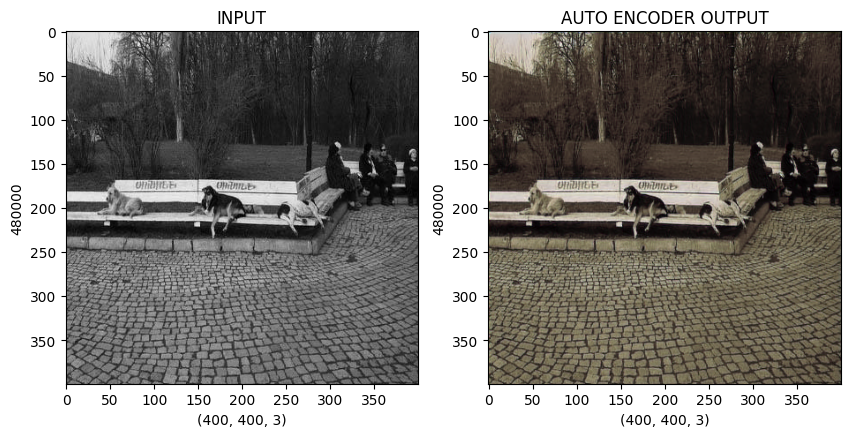

In [40]:
figure,axis = plt.subplots(1,2,figsize=(10,10))
prediction_img_number = 6

Original_Img = x_test_gray[prediction_img_number]
Predict_Image_AE = pred_color_images[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("INPUT")
axis[1].imshow(Predict_Image_AE)
axis[1].set_xlabel(Predict_Image_AE.shape)
axis[1].set_ylabel(Predict_Image_AE.size)
axis[1].set_title("AUTO ENCODER OUTPUT")

In [29]:
Encoder_B = Sequential()
Encoder_B.add(Conv2D(32,(2,2),kernel_initializer = 'he_normal',padding = "same",use_bias = True))
Encoder_B.add(BatchNormalization())
Encoder_B.add(ReLU())
#
Encoder_B.add(Conv2D(64,(2,2),kernel_initializer = 'he_normal',padding = "same",use_bias = True))
Encoder_B.add(BatchNormalization())
Encoder_B.add(ReLU())
#
Encoder_B.add(Conv2D(128,(2,2),kernel_initializer = 'he_normal',padding = "same",use_bias = True))
Encoder_B.add(BatchNormalization())
Encoder_B.add(ReLU())


Decoder_B = Sequential()
#
Decoder_B.add(Conv2DTranspose(64,(2,2),padding = "same",use_bias = True))
Encoder_B.add(BatchNormalization())
Decoder_B.add(ReLU())
#
Decoder_B.add(Conv2DTranspose(32,(2,2),padding = "same",use_bias = True))
Encoder_B.add(BatchNormalization())
Decoder_B.add(ReLU())
#
Decoder_B.add(Conv2DTranspose(1,(2,2),padding = "same",use_bias = True))
Encoder_B.add(BatchNormalization())
Decoder_B.add(ReLU())

In [30]:
Auto_Encoder_B = Sequential([Encoder_B,Decoder_B])

In [32]:
Auto_Encoder_B.compile(loss="mse",optimizer='adam',metrics=['accuracy'])

In [33]:
Auto_Encoder_B.fit(x_train_color,x_train_gray,epochs=40,batch_size=8)

Epoch 1/40


2024-03-13 10:20:43.428338: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[128,64,2,2]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,64,401,401]{3,2,1,0}, f32[8,128,400,400]{3,2,1,0}), window={size=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-13 10:20:46.422573: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 3.994344953s
Trying algorithm eng0{} for conv (f32[128,64,2,2]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,64,401,401]{3,2,1,0}, f32[8,128,400,400]{3,2,1,0}), window={size=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-13 10:20:48.942422: E external/local_xla/xla/service/sl

80/80 ━━━━━━━━━━━━━━━━━━━━ 67s 328ms/step - accuracy: 0.0067 - loss: 0.1321
Epoch 2/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 332ms/step - accuracy: 0.0110 - loss: 0.0159
Epoch 3/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 337ms/step - accuracy: 0.0100 - loss: 0.0114
Epoch 4/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 334ms/step - accuracy: 0.0069 - loss: 0.0064
Epoch 5/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 333ms/step - accuracy: 0.0101 - loss: 0.0053
Epoch 6/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 333ms/step - accuracy: 0.0093 - loss: 0.0038
Epoch 7/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 334ms/step - accuracy: 0.0101 - loss: 0.0051
Epoch 8/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 335ms/step - accuracy: 0.0083 - loss: 0.0040
Epoch 9/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 335ms/step - accuracy: 0.0071 - loss: 0.0024
Epoch 10/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 335ms/step - accuracy: 0.0086 - loss: 0.0034
Epoch 11/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 334ms/step - accuracy: 0.0097 - loss: 0.0023
Epoch 12/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 333ms/ste

In [35]:
pred_gray_images = Auto_Encoder_B.predict(x_test_color)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step


In [36]:
print(pred_gray_images[3].shape)

(400, 400, 1)


Text(0.5, 1.0, 'AUTO ENCODER OUTPUT')

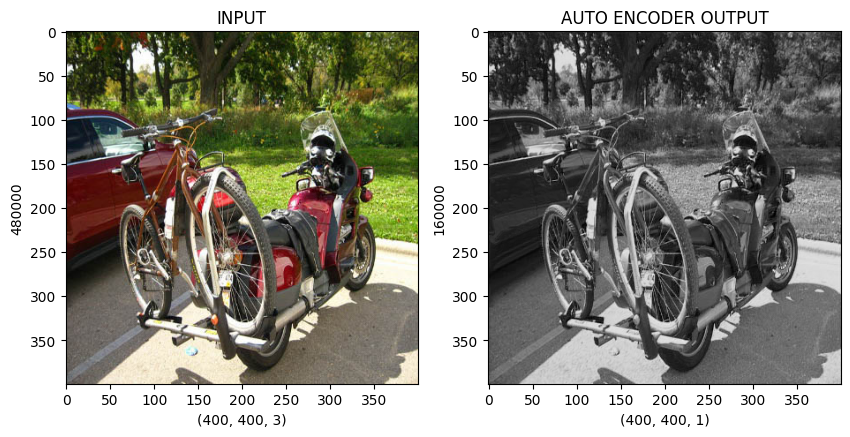

In [37]:
figure,axis = plt.subplots(1,2,figsize=(10,10))
prediction_img_number = 55

Original_Img = x_test_color[prediction_img_number]
Predict_Image_AE = pred_gray_images[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("INPUT")
axis[1].imshow(Predict_Image_AE,cmap='gray')
axis[1].set_xlabel(Predict_Image_AE.shape)
axis[1].set_ylabel(Predict_Image_AE.size)
axis[1].set_title("AUTO ENCODER OUTPUT")

Text(0.5, 1.0, 'AUTO ENCODER OUTPUT')

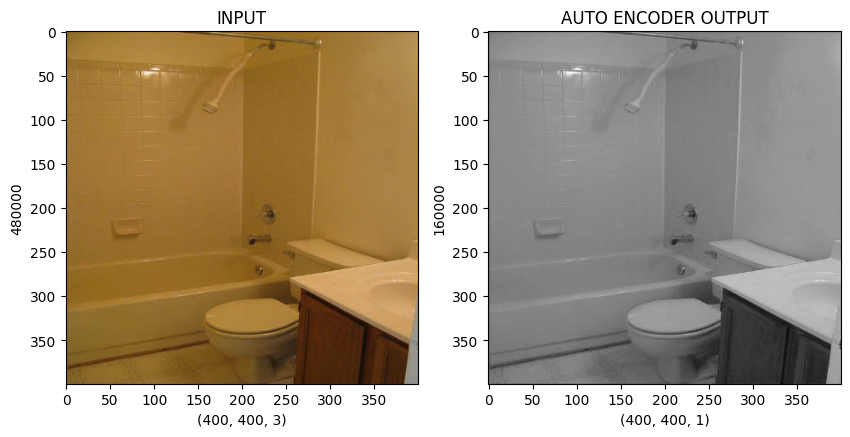

In [38]:
figure,axis = plt.subplots(1,2,figsize=(10,10))
prediction_img_number = 18

Original_Img = x_test_color[prediction_img_number]
Predict_Image_AE = pred_gray_images[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("INPUT")
axis[1].imshow(Predict_Image_AE,cmap='gray')
axis[1].set_xlabel(Predict_Image_AE.shape)
axis[1].set_ylabel(Predict_Image_AE.size)
axis[1].set_title("AUTO ENCODER OUTPUT")

Text(0.5, 1.0, 'AUTO ENCODER OUTPUT')

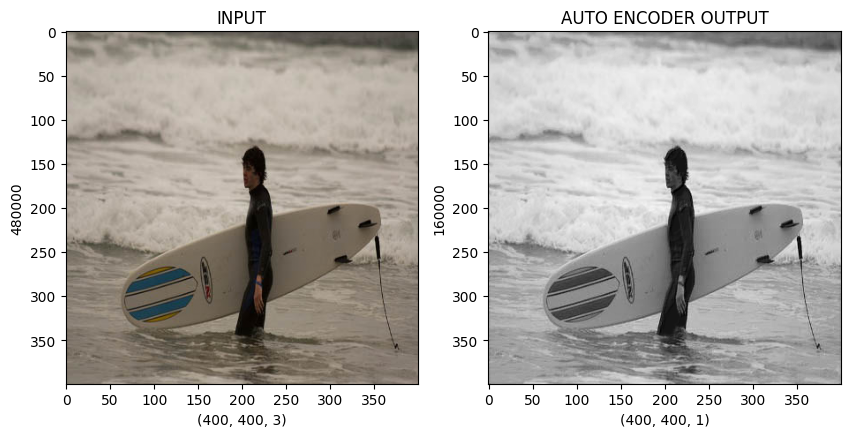

In [39]:
figure,axis = plt.subplots(1,2,figsize=(10,10))
prediction_img_number = 60

Original_Img = x_test_color[prediction_img_number]
Predict_Image_AE = pred_gray_images[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("INPUT")
axis[1].imshow(Predict_Image_AE,cmap='gray')
axis[1].set_xlabel(Predict_Image_AE.shape)
axis[1].set_ylabel(Predict_Image_AE.size)
axis[1].set_title("AUTO ENCODER OUTPUT")

Text(0.5, 1.0, 'AUTO ENCODER OUTPUT')

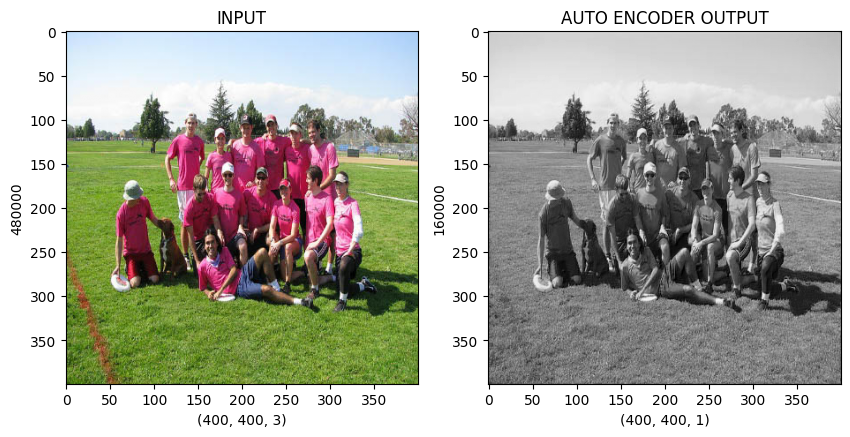

In [40]:
figure,axis = plt.subplots(1,2,figsize=(10,10))
prediction_img_number = 12

Original_Img = x_test_color[prediction_img_number]
Predict_Image_AE = pred_gray_images[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("INPUT")
axis[1].imshow(Predict_Image_AE,cmap='gray')
axis[1].set_xlabel(Predict_Image_AE.shape)
axis[1].set_ylabel(Predict_Image_AE.size)
axis[1].set_title("AUTO ENCODER OUTPUT")